<a href="https://colab.research.google.com/github/m7saikat/cs6220/blob/master/Assignment_6_DMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing IRIS data set

In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import itertools

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [0]:
fileURL="http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cols=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
iris=pd.read_csv(fileURL, names=cols, header=None)
iris = iris.dropna()

In [42]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1
    colors = ['red', 'yellow', 'green']
    index = 0

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='x', label=name, color=colors[index])
                    index = (index+1)%3
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


#### A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.

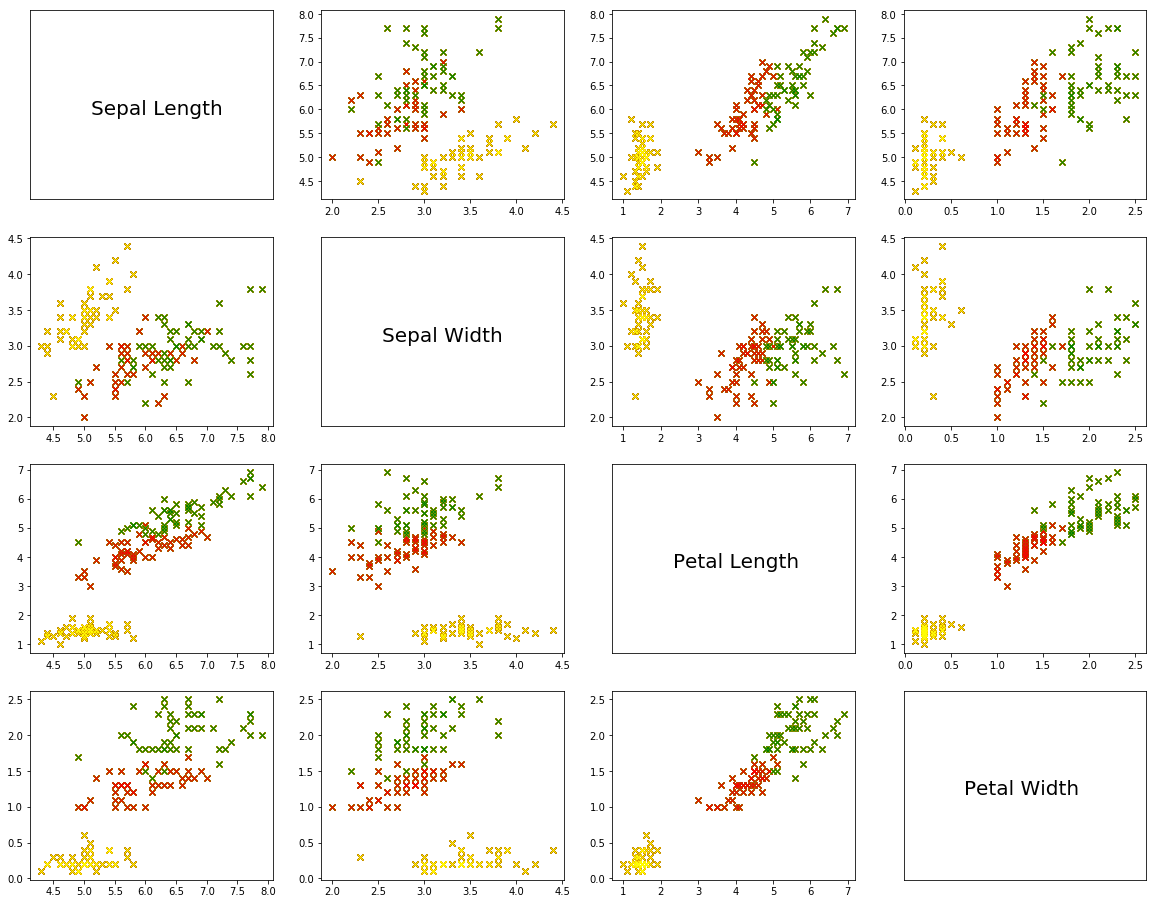

In [31]:
pairs(iris)

#### A plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics.

In [0]:
def plot_graph(fit, X_test, Y_test, pair):
  """
  Plot the graph given a set of data
  """
  plt.scatter(X_test, Y_test,  color='green')
  plt.plot(X_test, fit.predict(X_test), color='blue', linewidth=2)
  plt.xlabel(pair[0])
  plt.ylabel(pair[1])
  pl.show()

In [0]:

def split_data(predictor, target):
  """
  Split the data into 70/20 for training and testing 
  """
  X = iris[predictor]
  Y = iris[target]
  # Using Scikit learn's algorithm for spliting
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)
  return X_train, X_test, Y_train, Y_test
 

In [0]:
def print_statistic(fit, X_test, Y_test):
  """
  Print the statistics
  """
  print ('Intercept Value: {}'.format(fit.intercept_))
  print ('Mean Square Error: {}'.format(np.mean((fit.predict(X_test) - Y_test) ** 2)))
  print ('Variance Score: {}'.format(fit.score(X_test, Y_test)))


In [0]:
def set_label(value1, value2, value3=None):
  # Setting label
  label = ''
  if not value3:
     label = '{} -> {}'.format(value1, value2)
  else:
     label = '{}, {} -> {}'.format(value1, value2, value3)
  return label

In [0]:
linear_regression = LinearRegression()
def plot_linear_regression(iris, r):      
  # Get combinatiion of all pairs
  for pair in itertools.permutations(cols[:len(cols)-1], r=r):
    pair = list(pair) 
    # Get labels for graphs
    if r==2:
      print (set_label(pair[0], pair[1]))
    else:
      print (set_label(pair[0], pair[1], pair[2]))
    
    # For each pair split the data
    X_train, X_test, Y_train, Y_test = split_data([pair[0]], pair[1])
    # Running lineargression().fit
    fit = linear_regression.fit(X_train, Y_train)
    print_statistic(fit, X_test, Y_test)
    plot_graph(fit, X_test, Y_test, pair)
    print('\n')   

Sepal_Length -> Sepal_Width
Intercept Value: 3.3594504384939974
Mean Square Error: 0.09432512516691609
Variance Score: 0.0036078327438441304


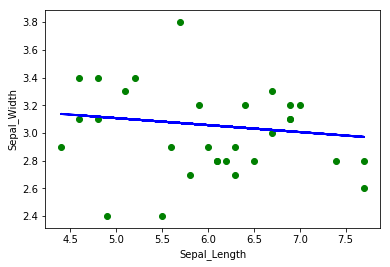



Sepal_Length -> Petal_Length
Intercept Value: -7.126803500687197
Mean Square Error: 0.5275852474696807
Variance Score: 0.7973155975725714


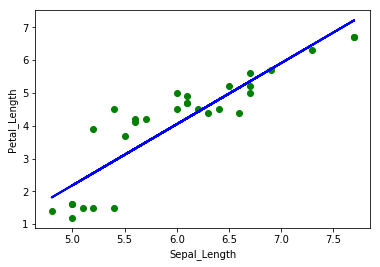



Sepal_Length -> Petal_Width
Intercept Value: -3.122557245389934
Mean Square Error: 0.14728994836850323
Variance Score: 0.7751832414156894


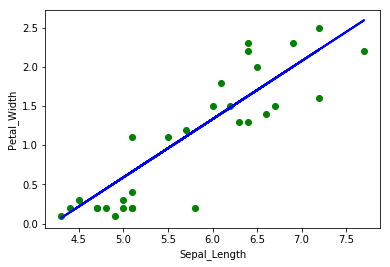



Sepal_Width -> Sepal_Length
Intercept Value: 6.443965672990063
Mean Square Error: 0.7718087729749126
Variance Score: 0.015284875919789442


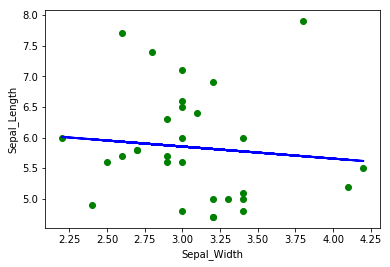



Sepal_Width -> Petal_Length
Intercept Value: 9.014375
Mean Square Error: 3.152463156828704
Variance Score: 0.02949373301800828


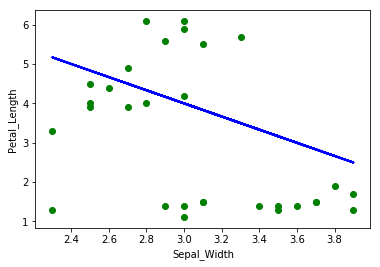



Sepal_Width -> Petal_Width
Intercept Value: 3.140972836253087
Mean Square Error: 0.4811081871789984
Variance Score: 0.059702993634827006


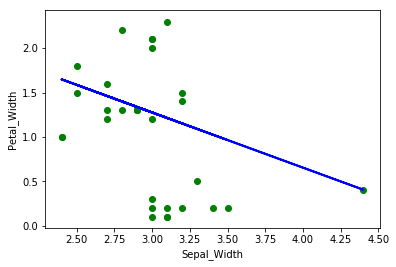



Petal_Length -> Sepal_Length
Intercept Value: 4.216652668254621
Mean Square Error: 0.1943213067696673
Variance Score: 0.6738420094875133


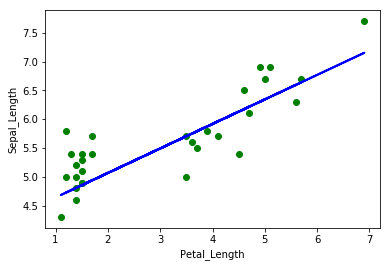



Petal_Length -> Sepal_Width
Intercept Value: 3.4638198551497803
Mean Square Error: 0.23102836223169002
Variance Score: 0.04638815809704188


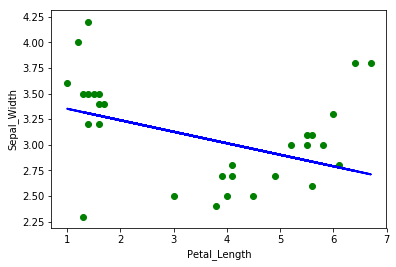



Petal_Length -> Petal_Width
Intercept Value: -0.35981392687674507
Mean Square Error: 0.030080941699249766
Variance Score: 0.9515344655758596


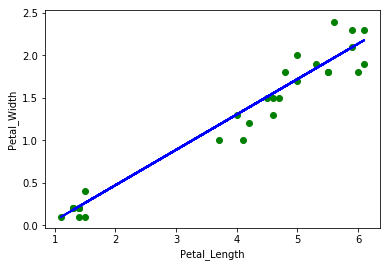



Petal_Width -> Sepal_Length
Intercept Value: 4.775189180698593
Mean Square Error: 0.28335374445459327
Variance Score: 0.4300119129900228


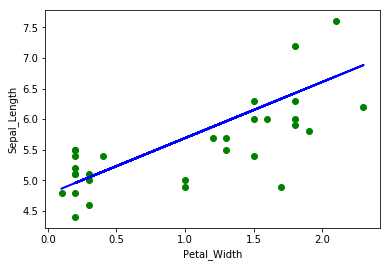



Petal_Width -> Sepal_Width
Intercept Value: 3.349519600996273
Mean Square Error: 0.16856504344884984
Variance Score: -0.07625240567511926


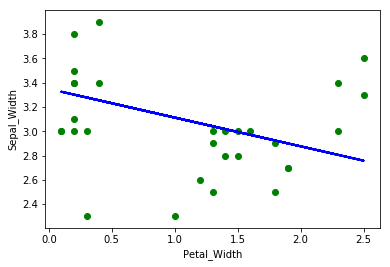



Petal_Width -> Petal_Length
Intercept Value: 1.1241985235856675
Mean Square Error: 0.28934916817422274
Variance Score: 0.9005251361375762


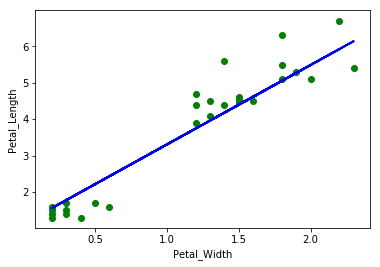

In [175]:
plot_linear_regression(iris, 2) 

#### A plot of the best overall linear regression model you were able to generate using any combination of features (including the use of multiple features used in combination to predict a single feature), with corresponding model statistics.

Sepal_Length, Sepal_Width -> Petal_Length
Intercept Value: 3.3353614597252634
Mean Square Error: 0.19731174880899457
Variance Score: 0.017208622900574677


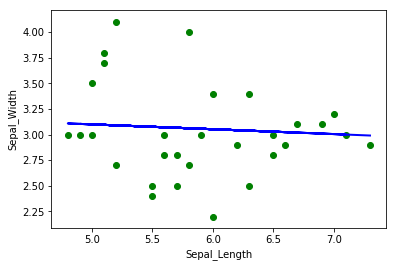



Sepal_Length, Sepal_Width -> Petal_Width
Intercept Value: 3.495006748042768
Mean Square Error: 0.2207989145210317
Variance Score: -0.02638821893976795


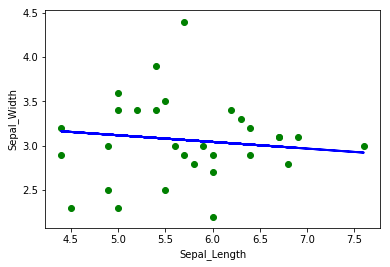



Sepal_Length, Petal_Length -> Sepal_Width
Intercept Value: -7.0202199059990305
Mean Square Error: 0.6257183588507885
Variance Score: 0.7418192090785805


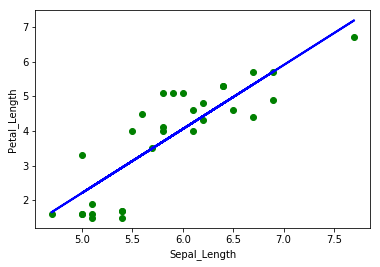



Sepal_Length, Petal_Length -> Petal_Width
Intercept Value: -7.187614111171063
Mean Square Error: 0.4517219770161542
Variance Score: 0.8651616438267055


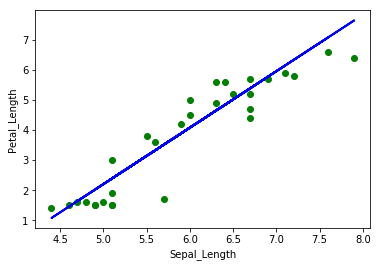



Sepal_Length, Petal_Width -> Sepal_Width
Intercept Value: -3.1877920120572716
Mean Square Error: 0.18251336045622987
Variance Score: 0.6794011546361799


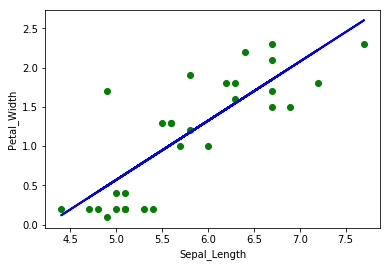



Sepal_Length, Petal_Width -> Petal_Length
Intercept Value: -3.27727913977302
Mean Square Error: 0.234495617680362
Variance Score: 0.623132043013704


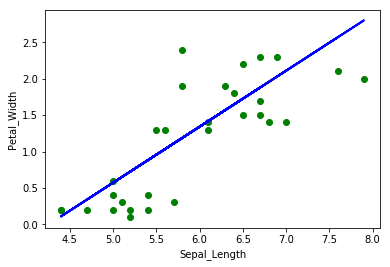



Sepal_Width, Sepal_Length -> Petal_Length
Intercept Value: 6.312875671137232
Mean Square Error: 0.7811493908833023
Variance Score: -0.1205343424474774


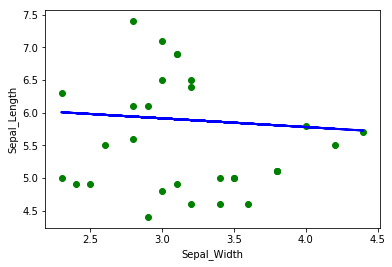



Sepal_Width, Sepal_Length -> Petal_Width
Intercept Value: 6.513833237635594
Mean Square Error: 0.9485615454105907
Variance Score: -0.07812865082533249


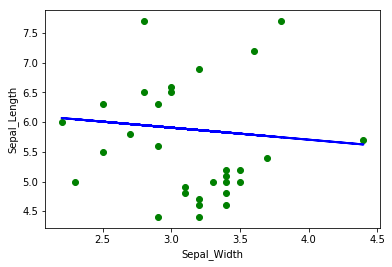



Sepal_Width, Petal_Length -> Sepal_Length
Intercept Value: 8.928409972836636
Mean Square Error: 2.70322774117178
Variance Score: 0.060658079677452174


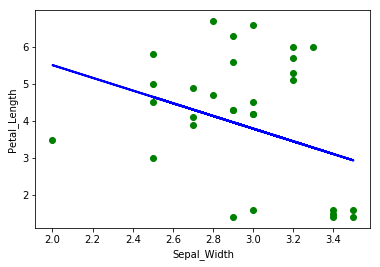



Sepal_Width, Petal_Length -> Petal_Width
Intercept Value: 9.631574118139767
Mean Square Error: 2.5906894446216664
Variance Score: 0.005234673914091825


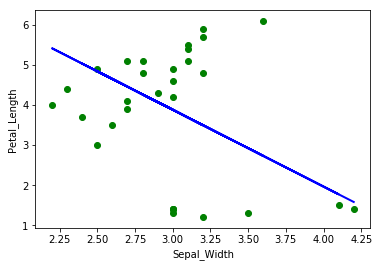



Sepal_Width, Petal_Width -> Sepal_Length
Intercept Value: 3.2326579299977123
Mean Square Error: 0.48267110780498373
Variance Score: 0.06113381092203107


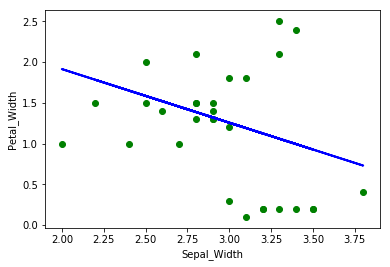



Sepal_Width, Petal_Width -> Petal_Length
Intercept Value: 3.1277253627829245
Mean Square Error: 0.34932884263643277
Variance Score: 0.15064848073052328


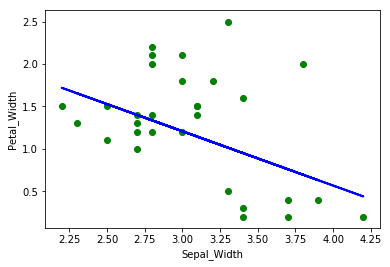



Petal_Length, Sepal_Length -> Sepal_Width
Intercept Value: 4.328133842225747
Mean Square Error: 0.17230402342780848
Variance Score: 0.7838424038067108


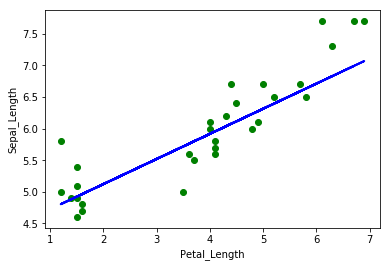



Petal_Length, Sepal_Length -> Petal_Width
Intercept Value: 4.317906830506582
Mean Square Error: 0.22584350203036754
Variance Score: 0.6821344095279838


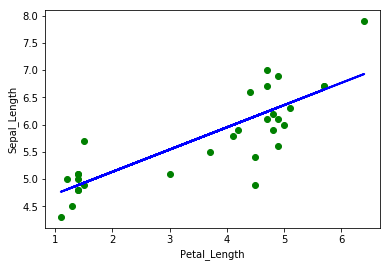



Petal_Length, Sepal_Width -> Sepal_Length
Intercept Value: 3.4714666200984077
Mean Square Error: 0.1602377948478293
Variance Score: 0.07460205747531878


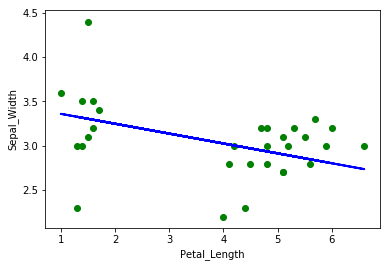



Petal_Length, Sepal_Width -> Petal_Width
Intercept Value: 3.4121363857909075
Mean Square Error: 0.15266707965401055
Variance Score: 0.2325716505327892


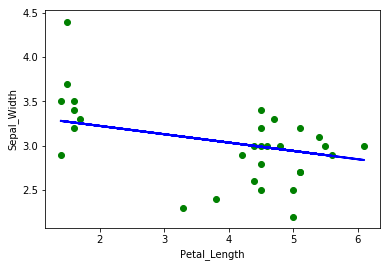



Petal_Length, Petal_Width -> Sepal_Length
Intercept Value: -0.3374025974025976
Mean Square Error: 0.03055050267716875
Variance Score: 0.9515831368584553


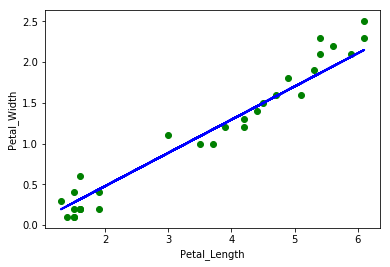



Petal_Length, Petal_Width -> Sepal_Width
Intercept Value: -0.37916264922983633
Mean Square Error: 0.05989557480623709
Variance Score: 0.9019694532986354


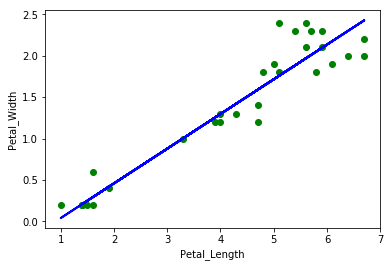



Petal_Width, Sepal_Length -> Sepal_Width
Intercept Value: 4.823892240517863
Mean Square Error: 0.27178481648089453
Variance Score: 0.5354017458397975


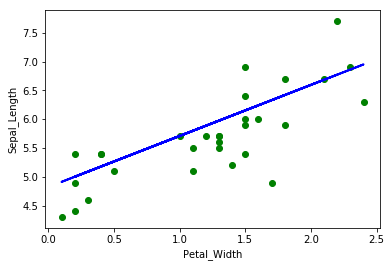



Petal_Width, Sepal_Length -> Petal_Length
Intercept Value: 4.7527278637161805
Mean Square Error: 0.15986301769858224
Variance Score: 0.6807351249778676


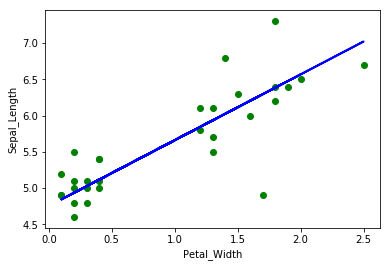



Petal_Width, Sepal_Width -> Sepal_Length
Intercept Value: 3.3230442140692737
Mean Square Error: 0.1136613411823486
Variance Score: -0.0374767450721476


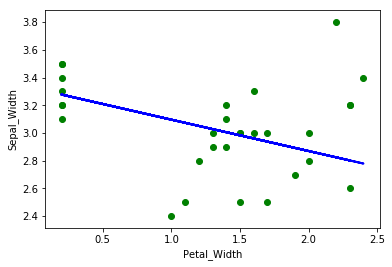



Petal_Width, Sepal_Width -> Petal_Length
Intercept Value: 3.268463269454123
Mean Square Error: 0.1507433813490757
Variance Score: 0.15148512593552976


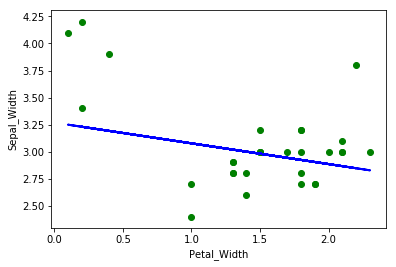



Petal_Width, Petal_Length -> Sepal_Length
Intercept Value: 1.1033782368953724
Mean Square Error: 0.25381825719408535
Variance Score: 0.9210393110794608


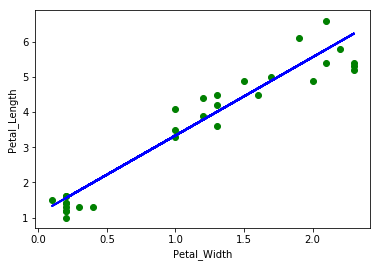



Petal_Width, Petal_Length -> Sepal_Width
Intercept Value: 1.1304114770246234
Mean Square Error: 0.39411295142432506
Variance Score: 0.9057068348848809


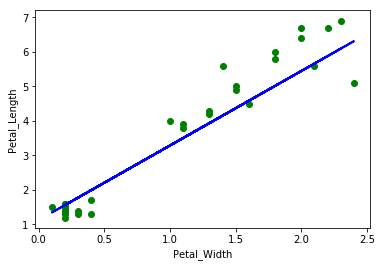

In [176]:
plot_linear_regression(iris, 3) 

#### Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.

The prediction of Petal width from Petal length has the highest correlation and the least Mean Square error. Also, from the linear regression model, we can see that it can predict the output with a higher precession.

#### Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

Since we know that removing one of the highly correlated feature doesn't affect the classication, we can say that removing the Petal width would not reduce the performance of classification.It is primarily bcause we can predict the value of Petal width easily from Petal length.